# Summary

A model was develop to predict the ten closest observations in the Iris dataset given a new observation.The model developed is inspired by a k-nearest neighbors algorithm, where k is equal to ten.

To implement this model, the data quality was first assesed and steps to standardise the data was taken. Then, the model was implement in the MY_K_NN_POINTS function. Finally, The results of the model is visualised in multiple charts

# My Machine Learning Implementation Workflow

The workflow for this model implementation is shown below:

1. Code Initialization
2. Download Data
3. Data Preparation & Preprocessing
    1. Summarise Data
    2. Analyse data readiness (incomplete/outliners/noisy/etc)
4. Data Exploration & Visualization
5. 10-Nearest Neighbor Function Implementation
    1. Feature standardization
    2. Function implementation
6. Example & Result visualization
7. Conclusion
   

#  1.0 Code Initialization

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib
import sys
%matplotlib inline
# Prints version
print('Version of Python and Libraries:\n')
print('Python: {}'.format(sys.version))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pd.__version__))
print('sklearn: {}'.format(skl.__version__))

Version of Python and Libraries:

Python: 2.7.13 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:17:26) [MSC v.1500 64 bit (AMD64)]
numpy: 1.12.1
matplotlib: 2.0.2
pandas: 0.20.1
sklearn: 0.18.1


# 2.0 Download Data

Data was downloaded from the provided URL (https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). It has 150 rows and 5 columns of experimental results on the Iris flower. The top 5 row of dataset is shown below:

In [182]:
# Download data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Store data in dataframe
name = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']
df = pd.read_csv(url, names=name)
print 'NUmber of rows:', df.shape[0]; print 'Number of columns:', df.shape[1]
df.head()

NUmber of rows: 150
Number of columns: 5


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The 5 columns of data are divided into 4 input parameters and a column of results (Iris Species). The data type of dataset was checked and the inputs are given in numeric float64. While, output is an object of strings. In a lot of implementations, we will change the datatype of the output to integers to allow us to train the data with certain algorithms such as logistic regression. However, it is not necessary for our implementation. The data type of each pandas series is shown below:

In [183]:
print df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Class            object
dtype: object


# 3.0 Data Preparation & Preprocessing

To build our Iris species similiarity prediction model, we begin by assessing the quality of the data. 

The summary statistics of the dataset shows that there is **no missing values in inputs and outputs**. No corrective step is necessary to solve this problem.

In [184]:
print df.describe();print;
print df.describe(include=[np.object]); print
print 'Is there missing values ?:', df.isnull().values.any()

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

              Class
count           150
unique            3
top     Iris-setosa
freq             50

Is there missing values ?: False


Next, the data is checked for outliers using a boxplot and the tabulated summary statistics. ** The dataset do not have outliers **. They do show some suspected outliers within sepal length's recorded values. However, there are within 3 times the interquartile range (< 3*IQR). Hence, no corrective measures is necessary.

Besides that, **it is unlikely to have any data entry error** because no negative values were tabulated for all length measurement in the input data, no outliers are detected and there is no inconsistency in the data type of the inputs. For example, no strings are keyed into the various length measurements of the inputs

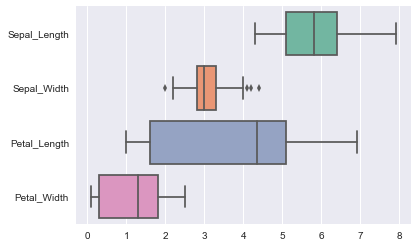

In [185]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

K-NN can suffer from skewed class distributions. For example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large frequency = more common). Hence, it is important to  check whether the data is skewed. **The histogram below shows that all 3 labels of iris species are not skewed and they are distributed equally** which is convenient.



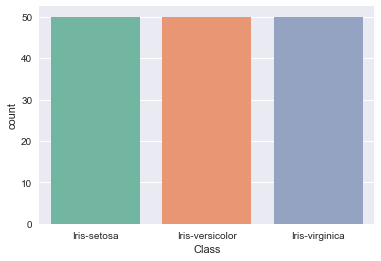

In [186]:
ax = sns.countplot(x="Class", data=df, palette="Set2")

**The data quality of the Iris dataset is very good as we have assessed earlier**. There is no issues with the dataset. Our final step in preparing the data is to standardise the dataset.

# 4.0 Data Exploration and Feature Engineering

In this section, we would explore the data to understand the nature of data and how it relates to the labels. A seaborn pairplot is plotted below and it quickly shows the relation between the various features and labels:

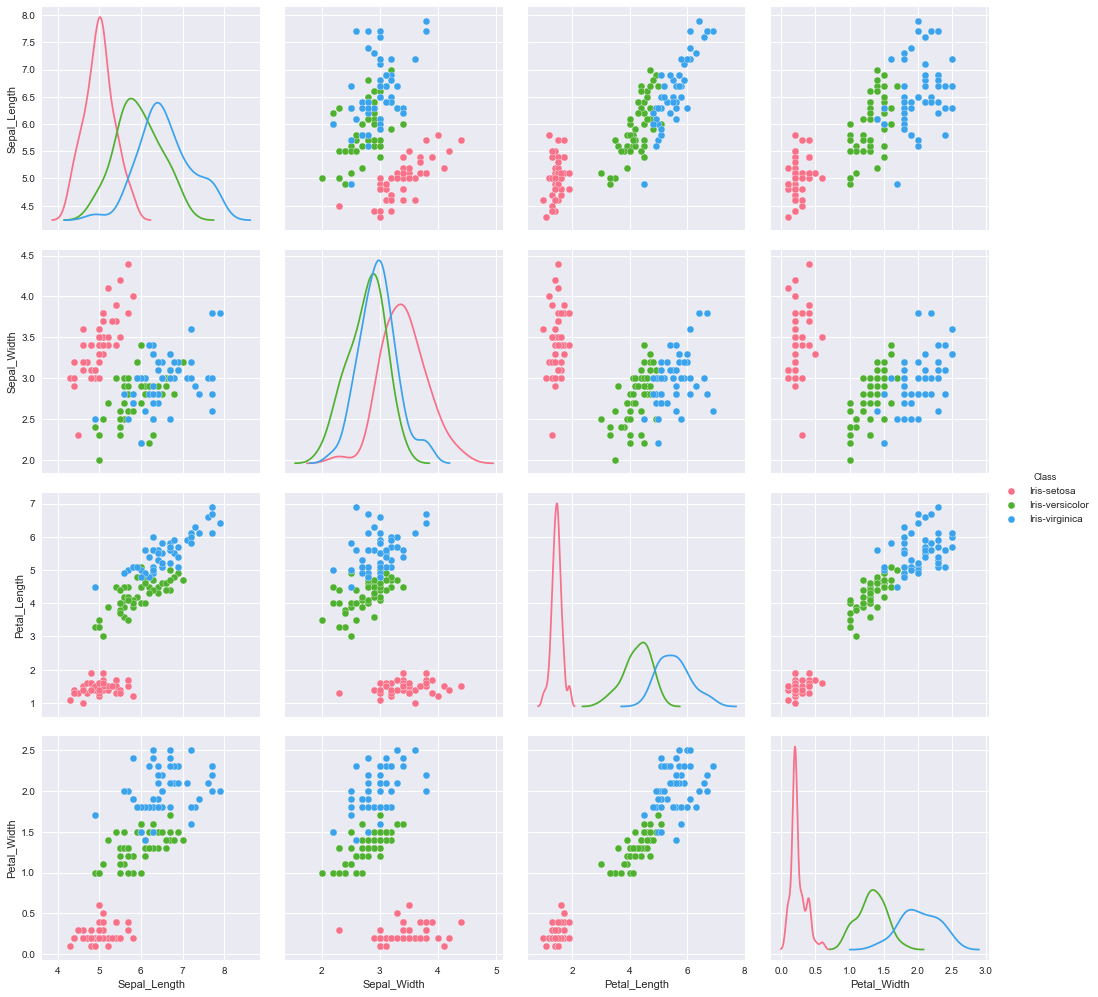

In [187]:
# plot pairplot
ax = sns.pairplot(df, hue="Class", diag_kind="kde", palette="husl" , size=3.5)

From the pair plot above, several information can be learnt:
1. The features are roughly on the same scale and they have the same unit of length measurement of cm.  Features with very different scales would fail to predict well the nearest neighbouring data points as it will give more weights to features with larger values. Hence it is important to rescale the data points.

2. All the 4 features are approximately normally distributed. Applying feature standardization will not significantly change the distribution of these features.

3. The petal length and petal width are strongly correlated feature. We may apply PCA without significant loss of information.

4. For petal length and petal width feature, there is a good separation of distribution of values.

5. Sepal width features seem to show the weakest signal as the distribution of value for the 3 labels are very close. The density curve for all 3 labels are very close for sepal width.



# 5.0 K-Nearest Neighbour Implementation

The MY_K_NN_POINT function implemented will be utilizing standardised Euclidian distance to identify the similarity of the new data point to the observations in the Iris dataset. Hence in the final pre-processing, we will standardize the Iris dataset.

Feature standardization is performed to mitigates the issue of unequal weights given to each features if the features have very different scale from each other. Feature standardization is preferred over min-max scaling because min-max scaling is highly sensitive to outliers. 

By standardizing the data set, we are assuming that the features follow a Gaussian distribution. We also assume that the Gaussian distribution is isotropic. Where we are ignoring, the covariance between the different features or in other words, the covariance matrix is diagonal (Σ=σ^2I). However, this approach is computationally simpler and faster and it does not lead to significant error.

If the features has high dimensionality (dataset has more than 10 features), an additional processing step called the principal component analysis should be added in this implementation. By reducing the dimensionality to its important eigenvectors, we could elevate the issues with the "curse of dimensionality". The eigenvectors also help make the Euclidian distance metric more meaningful as the eigenvectors are orthogonal to each other and these vectors also attempt to capture the most out of the variance in the dataset (minimal loss of information). In this implementation, this step is not necessary, even though 3 principal components can explain close to 99% of variance because the amount of features is small.

Cross validation step using methods such as K folds cross validation is also not need because we are not solving the issue of overfitting and we are not fitting any hyperparameter of our K-NN algorithm. The only hyperparamater was K value and it is fixed to 10.

The result of **feature standardization and label encoding** is shown below:



In [188]:
from sklearn import preprocessing
# data shuffled is not needed
#df = skl.utils.shuffle(df,random_state=123) 


#Label encoded with integer (for plotting purposes only)
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['Class'])   # label encoded
print "unique labels:", le.classes_

# Features standardized
X = df.values[:,0:4]                #  4 features
scaler = preprocessing.StandardScaler().fit(X);
print 'feature mean (cm):', scaler.mean_
print 'feature std dev (cm)', scaler.scale_


unique labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
feature mean (cm): [ 5.84333333  3.054       3.75866667  1.19866667]
feature std dev (cm) [ 0.82530129  0.43214658  1.75852918  0.76061262]


Now, **the data is ready to be studied by our nearest neighbor algorithm**. All necessary corrective steps was taken. 

###  5.1 10 Nearest Neighhbours Algorithm Implementation

The function takes a new observation in the form a list with 4 values in it, the training iris dataset and the number (k) of closest data points to be returned by the function. The function outputs a dataframe containing k numbers of data points from the Iris database.

The algorithm works by first extracting the dataset and standardizing the dataset and the new observation. Then, it calculates the Euclidean distance between the new observation and the Iris dataset. The distance is sorted and the data points with the small distance to the new observation is returned.

Another function called PREDICT_IRIS_SPECIES is also built to return the most likely Iris species for the new observation and its probability.


In [189]:

def MY_K_NN_POINTS(obs,dataframe,k):
    # takes in new input features as a list
    # takes in dataframe of iris dataset 
    # takes in a value of k (number of closest points )
    # returns a dataframe of the  K closest neighbouring points
    
    try:      
        X = dataframe.values[:, 0:4]
        new_obs_mat = np.tile(np.array(obs), (np.shape(X)[0], 1))
        X_std = scaler.transform(X)
        feature_obs_mat_std = scaler.transform(new_obs_mat)
        Eud_Dist = np.sum((feature_obs_mat_std-X_std)**2, axis=1)**0.5
        ind = Eud_Dist.argsort()[:k]
        #X_closest1 = X[ind,:]
        K_df = dataframe.iloc[ind]
        return K_df
    except:
        print sys.exc_info()[0], "occured"
        
    
def PREDICT_IRIS_SPECIES(K_df):
    # takes in the result datafram from MY_K_NN_POINTS
    # returns the integer label of the iris species
    
    try:
        expected_iris_species = K_df.Class.mode().values.tolist()
        
        return le.transform(expected_iris_species)[0] , K_df['Class'].value_counts()/k
    except:
        print sys.exc_info()[0], "occured"

# New observation and parameters
new_observation = [5.1, 3.5, 1.9, 0.8];
k = 10;

# Computation and Print results
result_df = MY_K_NN_POINTS(new_observation, df, k)
print '%i %s : \n' % (k, 'closest points in Iris dataset')
print result_df
predict = PREDICT_IRIS_SPECIES(result_df)
print "\nProbabilty of Iris species:"
print predict[1]
print '\nThe observation is likely an' , le.inverse_transform(predict[0])


10 closest points in Iris dataset : 

    Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
43           5.0          3.5           1.6          0.6  Iris-setosa
26           5.0          3.4           1.6          0.4  Iris-setosa
23           5.1          3.3           1.7          0.5  Iris-setosa
17           5.1          3.5           1.4          0.3  Iris-setosa
31           5.4          3.4           1.5          0.4  Iris-setosa
21           5.1          3.7           1.5          0.4  Iris-setosa
40           5.0          3.5           1.3          0.3  Iris-setosa
27           5.2          3.5           1.5          0.2  Iris-setosa
0            5.1          3.5           1.4          0.2  Iris-setosa
39           5.1          3.4           1.5          0.2  Iris-setosa

Probabilty of Iris species:
Iris-setosa    1.0
Name: Class, dtype: float64

The observation is likely an Iris-setosa


# 6.0 Examples & Results Visualization 

In this section, we will show how to use the function and we will visualize the results. We will demonstrate by using a new observation (Sepal length = 6.1 cm, Sepal Width = 2.8 cm, Petal Length = 5.1 cm, Petal Width = 0.5 cm). The ten datapoints from the iris dataset is shown below:

In [190]:
new_observation = [6.1, 2.8, 4.6, 1.2]
result_df = MY_K_NN_POINTS(new_observation,df,10)
result_df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
73,6.1,2.8,4.7,1.2,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
78,6.0,2.9,4.5,1.5,Iris-versicolor
74,6.4,2.9,4.3,1.3,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [191]:
# adding the new observation to the dataset
new_observation.append('New-observation')
result_df.loc[len(result_df)] = new_observation
df.loc[len(df)] = new_observation

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### 6.1 Result Visualization

Since the iris dataset has 5 dimensions (4 features, 1 label), principal component analysis (PCA) was perform to reduce the dimensions of the features from 5 dimension to 2 dimensions. It was performed to visualize the results easily. Visualizing data with more than 3 dimensions is hard.

The colourmap plots the classification results in the range of the Iris dataset. While, the scatter plots show the precise location of all ten closest iris data points (in terms of 2 eigenvector) and the new observation:


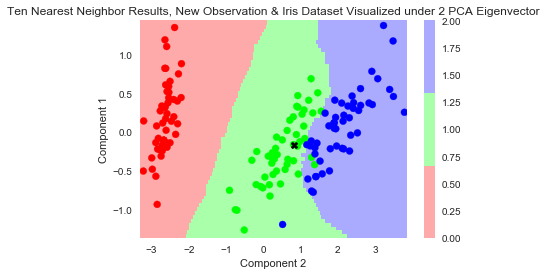

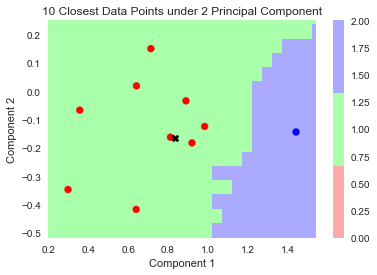

Red: Iris-setosa
Green: Iris-versicolor
Blue: Iris-virginica
Black: New observation

PCA Component explained variance ratio [ 0.92461621  0.05301557]


In [192]:
from sklearn import decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# apply PCA to help visual the data on a 2D plane 
pca = decomposition.PCA(n_components=2)
X_PCA = pca.fit_transform(X)

# preparing colour plot
h = .05
x_min, x_max = X_PCA[:, 0].min() - .1, X_PCA[:, 0].max() + .1
y_min, y_max = X_PCA[:, 1].min() - .1, X_PCA[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z=[];
data_mesh = np.c_[xx.ravel(), yy.ravel()]

for new_observation_PCA in np.c_[xx.ravel(), yy.ravel()]:
    new_observation = pca.inverse_transform(new_observation_PCA)
    grid_df = MY_K_NN_POINTS(new_observation,df,k)
    Z.append(PREDICT_IRIS_SPECIES(grid_df)[0])

Z = np.array(Z).reshape(xx.shape)

# create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# print the colour of the results
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.colorbar()

# plot also the training points
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c = y, cmap=cmap_bold)
obs_PCA = pca.transform(result_df.values[-1,:-1].reshape(1,-1))
plt.scatter(x = obs_PCA[0,0], y = obs_PCA[0,1], marker = 'X', color = 'k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Component 2')
plt.ylabel('Component 1')
plt.title('Ten Nearest Neighbor Results, New Observation & Iris Dataset Visualized under 2 PCA Eigenvector')


results_pts_PCA = pca.transform(result_df.values[:-1, :-1])
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.colorbar()
plt.scatter(results_pts_PCA[:, 0], results_pts_PCA[:, 1], c = le.transform(result_df.Class[:-1]), cmap=cmap_bold)
plt.scatter(x = obs_PCA[0,0], y = obs_PCA[0,1], marker = 'X', color = 'k')

plt.xlim(results_pts_PCA.min(axis=0)[0]-.1, results_pts_PCA.max(axis=0)[0]+.1)
plt.ylim(results_pts_PCA.min(axis=0)[1]-.1, results_pts_PCA.max(axis=0)[1]+.1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('10 Closest Data Points under 2 Principal Component')
plt.show()

print 'Red: Iris-setosa'
print 'Green: Iris-versicolor'
print 'Blue: Iris-virginica'
print 'Black: New observation\n'
print 'PCA Component explained variance ratio' , pca.explained_variance_ratio_


The scatter plot of the new observation and the Iris dataset in its original dimension is shown below:

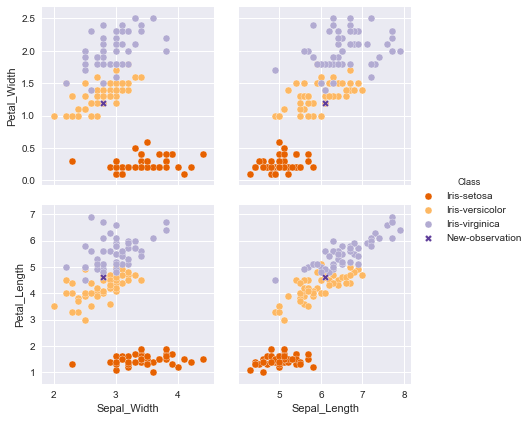

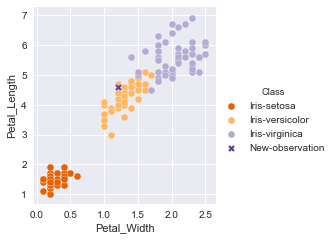

In [193]:
# pair scatter plots for all 4 features against each other
df_col = df['Class'].unique().tolist()
result_df_col=result_df['Class'].unique().tolist()
#color=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]
color=['#e66101','#fdb863','#b2abd2','#5e3c99']
mark=['o','o','o','X']
sns.pairplot(df,x_vars=["Sepal_Width", "Sepal_Length"],
             y_vars=["Petal_Width", "Petal_Length"],
             hue="Class", size = 3, palette=color, markers = mark)
sns.pairplot(df,x_vars="Petal_Width", y_vars="Petal_Length",
             hue="Class", size = 3.5, palette=color, markers = mark)

The scatter plot of the observation and ten computed closest data points in its original dimension is shown below:

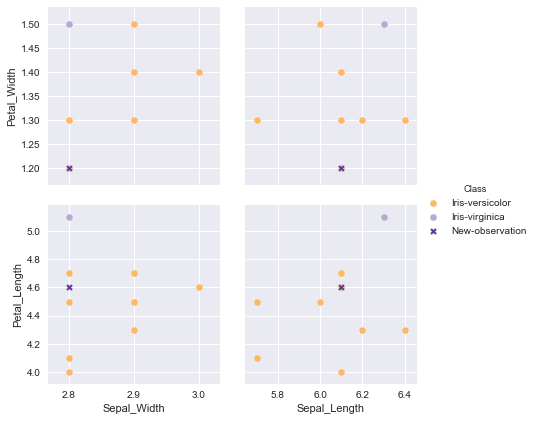

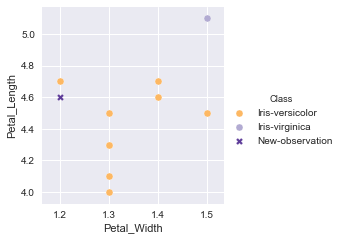

In [194]:
# pair scatter plots for all 4 features against each other
indx = [df_col.index(i) for i in result_df_col]
color_plot2 = [color[i] for i in indx]
mark_plot2 = [mark[i] for i in indx]

sns.pairplot(result_df,x_vars=["Sepal_Width", "Sepal_Length"],
             y_vars=["Petal_Width", "Petal_Length"],
             hue="Class", size = 3, palette=color_plot2, markers = mark_plot2)
sns.pairplot(result_df,x_vars="Petal_Width", y_vars="Petal_Length",
             hue="Class", size = 3.5, palette=color_plot2, markers = mark_plot2)

# 7.0 Conclusion

The MY_K_NN_POINTS function works robustly to predict the closest 10 data points in the Iris dataset, given a new observation.  The dataset used for this algorithm was assessed and pre-processed. We developed the model based on sound principals and assumptions which gives reliably results. Finally, we developed a convenient method to visualise the results.

Thank you, Sugan.